In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("pandas",pd.__version__)
print("numpy",np.__version__)
print("seaborn",sns.__version__)

pandas 2.2.2
numpy 2.0.2
seaborn 0.13.2


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/22481A12C5/anemia.csv")

In [5]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [6]:
print("Shape of dataset:", df.shape)

Shape of dataset: (1421, 6)


In [7]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
None


In [8]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


In [ ]:
print("\nSummary Stats:\n", df.describe())


Summary Stats:
             Gender   Hemoglobin          MCH         MCHC          MCV  \
count  1421.000000  1421.000000  1421.000000  1421.000000  1421.000000   
mean      0.520760    13.412738    22.905630    30.251232    85.523786   
std       0.499745     1.974546     3.969375     1.400898     9.636701   
min       0.000000     6.600000    16.000000    27.800000    69.400000   
25%       0.000000    11.700000    19.400000    29.000000    77.300000   
50%       1.000000    13.200000    22.700000    30.400000    85.300000   
75%       1.000000    15.000000    26.200000    31.400000    94.200000   
max       1.000000    16.900000    30.000000    32.500000   101.600000   

            Result  
count  1421.000000  
mean      0.436312  
std       0.496102  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


In [9]:
df.dtypes

,0
Gender,int64
Hemoglobin,float64
MCH,float64
MCHC,float64
MCV,float64
Result,int64


Result
0    801
1    620
Name: count, dtype: int64


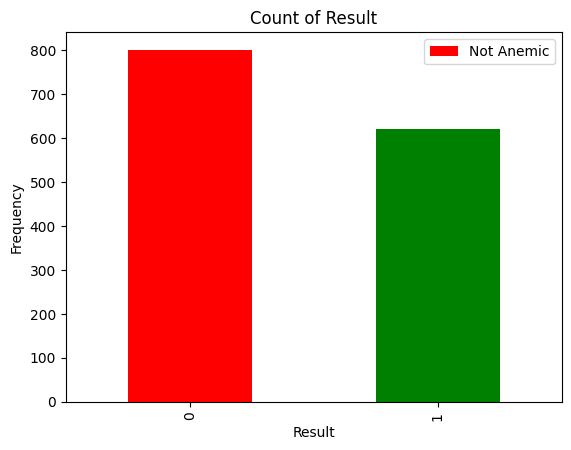

In [10]:
#0-not anemic 1-aenmic
#checking for the count of anemic and not anemic

results=df['Result'].value_counts()
print(results)

results.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.legend(['Not Anemic','Anemic'],loc="upper right")
plt.show()

In [11]:
print(df['Gender'].value_counts())

Gender
1    740
0    681
Name: count, dtype: int64


In [12]:
#The female count is more then male count
#Balancing it using the undersampling

from sklearn.utils import resample
majorclass = df[df['Result']==0]
minorclass= df[df['Result']==1]

major_downsample=resample(majorclass, replace=False,n_samples=len(minorclass),random_state=42)

df=pd.concat([major_downsample,minorclass])

print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


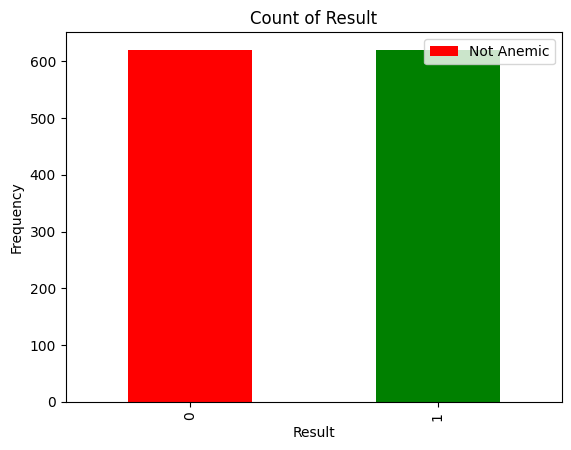

In [13]:
#plotting balanced Gender Count
result_balanced= df['Result'].value_counts()
result_balanced.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.legend(['Not Anemic','Anemic'],loc="upper right")
plt.show()

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,1240.0,0.540323,0.498573,0.0,0.0,1.0,1.000,1.0
Hemoglobin,1240.0,13.218145,1.976190,6.6,11.5,13.0,14.900,16.9
MCH,1240.0,22.903952,3.993624,16.0,19.4,22.7,26.200,30.0
MCHC,1240.0,30.277984,1.394515,27.8,29.1,30.4,31.500,32.5
MCV,1240.0,85.620968,9.673794,69.4,77.3,85.3,94.225,101.6
Result,1240.0,0.500000,0.500202,0.0,0.0,0.5,1.000,1.0


Gender
1    670
0    570
Name: count, dtype: int64


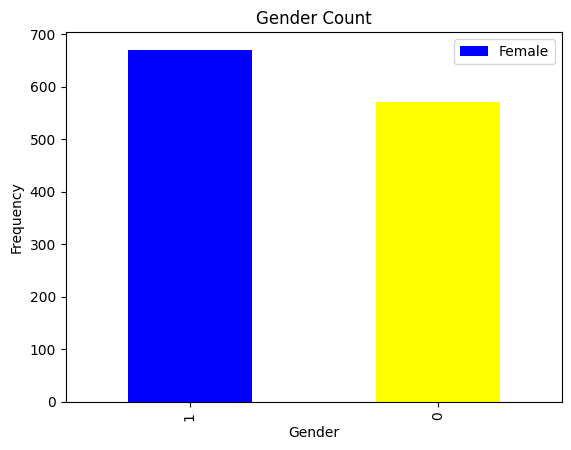

In [15]:
output= df['Gender'].value_counts()
print(output)
output.plot(kind='bar', color =['blue', 'yellow'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title("Gender Count")
plt.legend(['Female','Male'],loc="upper right")
plt.show()

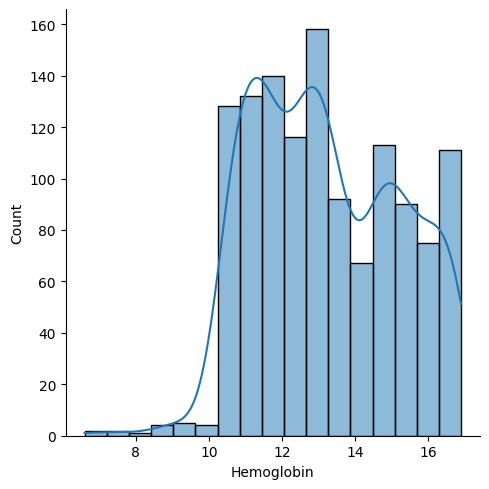

In [16]:
sns.displot(df['Hemoglobin'], kde=True)

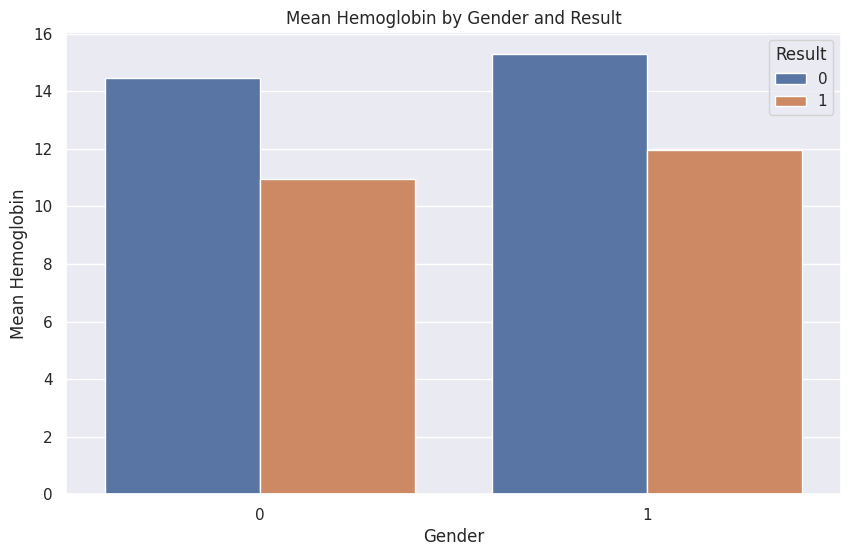

In [17]:
mean_hemoglobin = df.groupby(['Gender', 'Result'])['Hemoglobin'].mean().reset_index()

# Plot the histogram
sns.set_theme()
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Hemoglobin', hue='Result', data=mean_hemoglobin)
plt.title('Mean Hemoglobin by Gender and Result')
plt.xlabel('Gender')
plt.ylabel('Mean Hemoglobin')
plt.legend(title='Result')
plt.show()

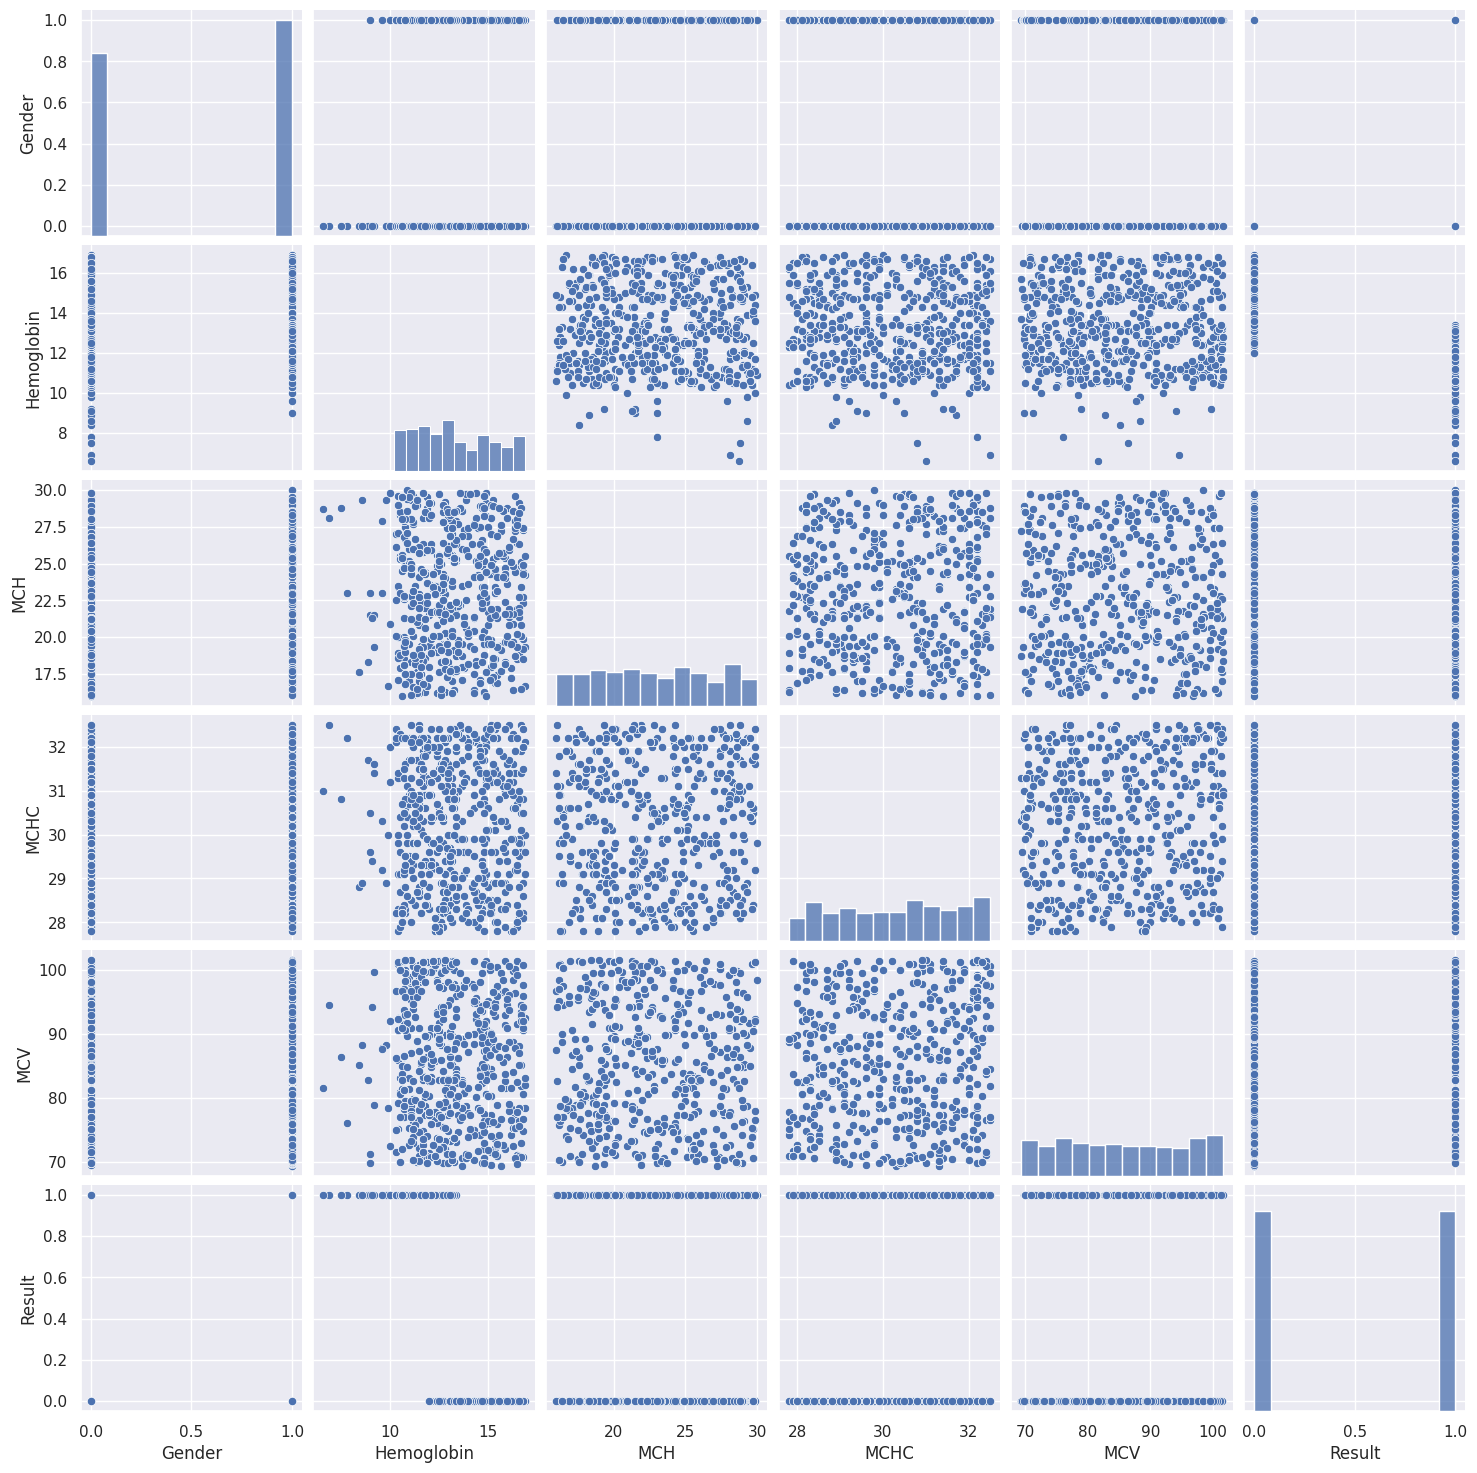

In [18]:
sns.pairplot(df)

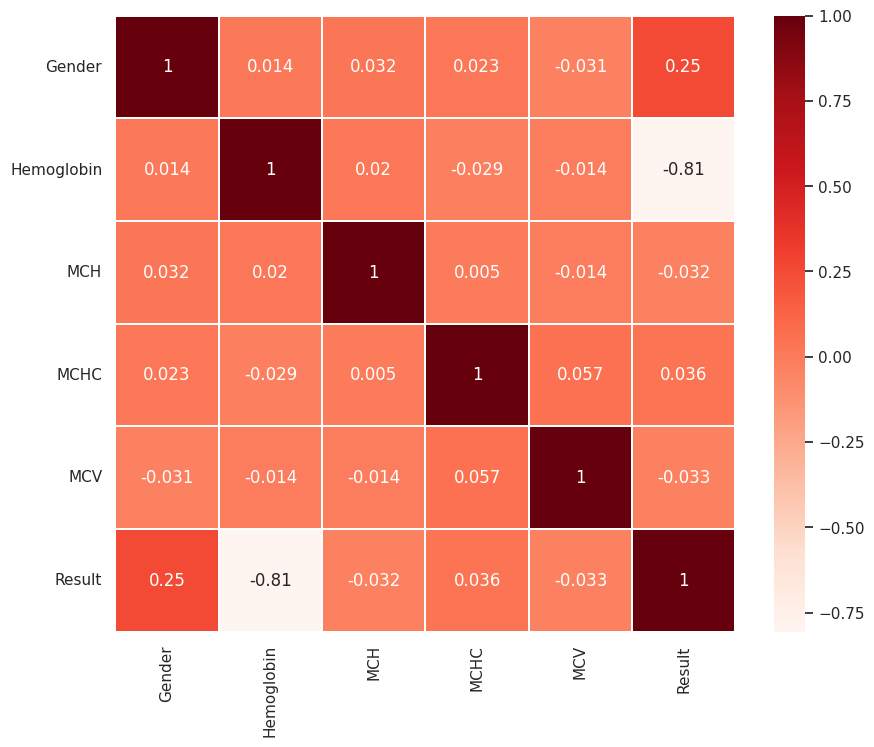

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='Reds',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [20]:
#Splitting data into train and test
X=df.drop('Result',axis=1)
X

,Gender,Hemoglobin,MCH,MCHC,MCV
1234,1,16.6,18.8,28.1,70.9
1188,0,15.3,18.3,30.4,93.4
106,0,14.8,20.4,28.5,91.1
954,0,14.6,16.9,31.9,78.1
112,0,15.9,28.7,31.0,81.6
...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7


In [21]:
Y=df['Result']
Y

,Result
1234,0
1188,0
106,0
954,0
112,0
...,...
1415,1
1416,1
1417,1
1418,1


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=20)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


In [24]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
c_lr = classification_report(y_test, y_pred)

print('Accuracy score: ', acc_lr)
print(c_lr)

Accuracy score:  0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.99      1.00      0.99       135

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



In [25]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test, y_pred)

print('Accuracy score: ', acc_rf)
print(c_rf)

Accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [26]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)

acc_dt = accuracy_score(y_test, y_pred)
c_dt = classification_report(y_test, y_pred)

print('Accuracy score: ', acc_dt)
print(c_dt)

Accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [27]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test,y_pred)
c_nb = classification_report(y_test,y_pred)

print('Accuracy score: ', acc_nb)
print(c_nb)

Accuracy score:  0.9798387096774194
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.97      0.99      0.98       135

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



In [28]:
from sklearn.svm import SVC

support_vector = SVC()
support_vector.fit(x_train,y_train)
y_pred = support_vector.predict(x_test)

acc_svc = accuracy_score(y_test, y_pred)
c_svc = classification_report(y_test,y_pred)

print('Accuracy score: ', acc_svc)
print( c_svc)

Accuracy score:  0.9395161290322581
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       113
           1       0.91      0.99      0.95       135

    accuracy                           0.94       248
   macro avg       0.95      0.93      0.94       248
weighted avg       0.94      0.94      0.94       248



In [29]:
from sklearn.ensemble import GradientBoostingClassifier

GCB = GradientBoostingClassifier()
GCB.fit(x_train,y_train)
y_pred = GCB.predict(x_test)

acc_gcb = accuracy_score(y_test,y_pred)
c_gcb = classification_report(y_test,y_pred)

print('Accuracy Score: ', acc_gcb)
print(c_gcb)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [30]:
model = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'Support Vector Classifier', 'Gradient Boost Classifier'], 'score':[acc_lr,acc_dt,acc_rf,acc_nb,acc_svc,acc_gcb]})

In [31]:
model

,Model,score
0,Logistic Regression,0.991935
1,Decision Tree Classifier,1.000000
2,Random Forest Classifier,1.000000
3,Gaussian Naive Bayes,0.979839
4,Support Vector Classifier,0.939516
5,Gradient Boost Classifier,1.000000


In [32]:
import pickle
import warnings
pickle.dump(support_vector, open("model.pkl", "wb"))


In [33]:
prediction = GCB.predict([[0,11.6,22.3,30.9,74.5]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
